In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [2]:
#Exploring data
#Description of the dataset
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
#Attributes in the dataset
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
#Target classes in the dataset
print(cancer.target_names)

['malignant' 'benign']


In [6]:
#Shape of the data and target arrays
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [9]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [10]:
# Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, test_size=0.2, random_state=42)

In [38]:
#Import Random Forest model classifier
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define hyperparameters for grid search
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_scaled, cancer.target)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [23]:
# Perform k-fold cross-validation on the model
from sklearn.model_selection import cross_val_score, train_test_split

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Report cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.97802198 0.94505495 0.97802198 0.95604396 0.93406593]
Mean CV Score: 0.9582417582417582


In [24]:
#Train the model using the training sets
rf_classifier.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_rf = rf_classifier.predict(X_test)

In [30]:
#Evaluating the model
#Import scikit-learn metrics module for accuracy, precision and recall calculation
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_test = accuracy_score(y_test, y_pred_rf)
precision_test = precision_score(y_test, y_pred_rf)
recall_test = recall_score(y_test, y_pred_rf)
print("Performance Metrics on Test Dataset:")
print("Accuracy on Test Dataset:", accuracy_test)
print("Precision on Test Dataset:",precision_test)
print("Recall on Test Dataset:",recall_test)

Performance Metrics on Test Dataset:
Accuracy on Test Dataset: 0.9649122807017544
Precision on Test Dataset: 0.958904109589041
Recall on Test Dataset: 0.9859154929577465


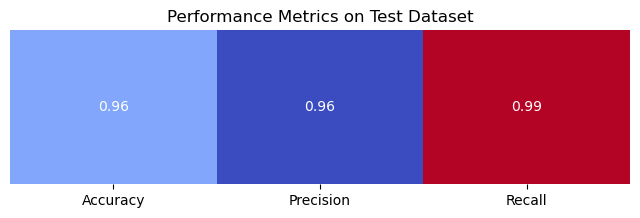

In [37]:
#Performance metrics visualization
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy_test, precision_test, recall_test]

# Create a 1x3 numpy array for the scores
data = np.array(scores).reshape(1, -1)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 2))
sns.heatmap(data, cmap='coolwarm', annot=True, xticklabels=metrics, yticklabels=False, cbar=False)
plt.title('Performance Metrics on Test Dataset')
plt.show()